# Using Tiled for Access to Structured Data

In this tutorial we will learn how to efficiently access and manipulate data in its native form without worrying about downloading large archives and opening esoteric file formats.

## What is Tiled?

Tiled is a flexible tool for structured data access, designed with the needs of scientists in mind — especially those working with a wide variety of data formats and workflows. It doesn’t enforce a single data format, but instead standardizes access through common structures like arrays and tables.



### 🔧 Key Design Principles of Tiled

📂 **Format-agnostic:** Works with any format — no “one format to rule them all.”

🧘‍♀️ **Meet users where they are:** Supports both classic file systems and modern databases.

🌐 **Web-first:** Uses web standards to make data accessible to tools like NumPy, Pandas, web apps, and more.

🔁 **Transcoding on the fly:** Converts data to the user’s preferred format on the fly.



| 💡 Use Cases | 🚫 Not This |
|-------------|-------------|
| 📎 Share URLs to slices of your data | ❌ Not a file transfer tool (like Globus) |
| 🧼 Skip the boilerplate I/O code | ❌ Not a storage format (like Zarr) |
| 🔄 Swap formats or storage backends without breaking code | ❌ Not a plotting or analysis tool (like Plotly) |
| 👥 Serve both file lovers and array users | ❌ Not a compute server |
| 🚀 Move from files to databases, smoothly | ❌ Not tied to one format |


### 📚 Learn more [here](https://blueskyproject.io/tiled/explanations/lineage.html)!


### Try our Demo Deployment...

* https://tiled-demo.blueskyproject.io/
* In the browser or on your phone!

### ...or Play with the Real Data!

## Initializing a Tiled Client

In [2]:
# Method 1. From a Predefined Profile

from tiled.client import from_profile
c = from_profile('chx')

print(c)

<Catalog {5, 6, 7, 8, 9, 10, 11, 12, 13, 14, ...} ~249327 entries>


In [241]:
# To see the entire list of available profiles:
import tiled
tiled.profiles.list_profiles()

{'amx': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'bmm': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'chx': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'cms': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'csx': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'esm': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'arpes': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'xpeem': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'fmx': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'haxpes': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'hex': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'hxn': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'ios': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'isr': PosixPath('/nsls2/software/etc/tiled/profiles/profiles.yml'),
 'iss': Posix

In [3]:
# Method 2. From a URI

from tiled.client import from_uri
c_prod = from_uri("https://tiled.nsls2.bnl.gov")  # Our production server (need to log in)

print(c_prod)

<Container {'tst', 'amx', 'bmm', 'chx', 'cms', 'csx', 'esm', ...} ~35 entries>


In [ ]:
c_demo = from_uri("https://tiled-demo.blueskyproject.io/") # Our demo server; open to everyone!

print(c_demo)

### Navigating the Catalog

The intialized client points to the catalog of all Bluesky Runs (presented in a form of a dictionary). The runs listed in the order of their acquisition. Each individual run can be accessed in several ways.

Learn more:

* https://blueskyproject.io/tiled/tutorials/navigation.html

In [4]:
# Method 1. Using a positional index
run = c[-1]
print(run)

# ...or...

run = c.values().first()
print(f"First run in the catalog:\n{run}")

run = c.values().last()
print(f"Last run in the catalog:\n{run}")

<BlueskyRun {'primary'} scan_id=167135 uid='7c273459' 2025-04-03 13:17>
First run in the catalog:
<BlueskyRun set() scan_id=5 uid='cdf2aa32' 2015-03-03 16:37>
Last run in the catalog:
<BlueskyRun {'primary'} scan_id=167135 uid='7c273459' 2025-04-03 13:17>


In [6]:
# Method 2. With a numerical ScanID
run = c[123456]
print(run)

<BlueskyRun {'eiger500K_single_image_metadata_patched_in_at_runtime', 'primary'} scan_id=123456 uid='92bd4434' 2022-12-18 13:24>


In [7]:
# Method 3. With a short (prefix) of the full uid
run = c['92bd4434']
print(run)

<BlueskyRun {'eiger500K_single_image_metadata_patched_in_at_runtime', 'primary'} scan_id=123456 uid='92bd4434' 2022-12-18 13:24>


In [8]:
# Method 4. With the full uid (most reliable!)
run = c['92bd4434-94dd-40c2-bb26-5b3359793e0a']
print(run)

<BlueskyRun {'eiger500K_single_image_metadata_patched_in_at_runtime', 'primary'} scan_id=123456 uid='92bd4434' 2022-12-18 13:24>


The returned object `run` is a client object itself and can be treated similarly to the root catalog (e.g. perform key-value lookup or traverse it as a nested folder structure). The children (elemnets) of this container are individual Bluesky streams, which eventually contain the acquired data and configuration parameters of the instrument. The internal structure can be visualized as a tree and individual elements addressed with the usual Python syntax.

In [141]:
from tiled.utils import tree

tree(run, max_lines=30)

├── primary
│   ├── data
│   │   ├── time
│   │   ├── eiger500K_single_image
│   │   ├── eiger500K_single_stats1_total
│   │   ├── eiger500K_single_stats2_total
│   │   ├── eiger500K_single_stats3_total
│   │   ├── eiger500K_single_stats4_total
│   │   └── eiger500K_single_stats5_total
│   ├── timestamps
│   │   ├── time
│   │   ├── eiger500K_single_image
│   │   ├── eiger500K_single_stats1_total
│   │   ├── eiger500K_single_stats2_total
│   │   ├── eiger500K_single_stats3_total
│   │   ├── eiger500K_single_stats4_total
│   │   └── eiger500K_single_stats5_total
│   ├── config
│   │   └── eiger500K_single
│   │       ├── eiger500K_single_cam_acquire_period
│   │       ├── eiger500K_single_cam_acquire_time
│   │       ├── eiger500K_single_cam_num_images
│   │       ├── eiger500K_single_beam_center_x
│   │       ├── eiger500K_single_beam_center_y
│   │       ├── eiger500K_single_wavelength
│   │       ├── eiger500K_single_det_distance
│   │       ├── eiger500K_single_threshold_energy
│   

In [145]:
stream = run['primary']

print(stream)

<BlueskyEventStream {'config', 'data', 'timestamps', 'config_timestamps'} stream_name='primary'>


In [162]:
data = stream['data']

print(data)

<DatasetClient {'time', 'eiger500K_single_image', ...} ~7 entries>


In [208]:
# It is possible to list all elements of a specific container as its keys
print("Stream names: ", list(run.keys()))

print("\nData keys in the 'primary' stream:")
for data_key in run['primary']['data'].keys():
    print(f"\t{data_key}")

Stream names:  ['primary', 'eiger500K_single_image_metadata_patched_in_at_runtime']

Data keys in the 'primary' stream:
	time
	eiger500K_single_image
	eiger500K_single_stats1_total
	eiger500K_single_stats2_total
	eiger500K_single_stats3_total
	eiger500K_single_stats4_total
	eiger500K_single_stats5_total


### Metadata Contains Very Useful Information

In [ ]:
run.metadata

In [ ]:
stream.metadata

In [155]:
data.metadata

{'attrs': {'object': 'eiger500K_single'}}

### Accessing Data in the Catalog

The `data` object above is a special type of client that allows us to read the data as arrays or tables or all of them simultaneously in a form of an xarray dataset.

In [10]:
img = c[123456]['primary/data/eiger500K_single_image']  # A shorthand notation :)

print(img)

<ArrayClient shape=(1, 1000, 514, 1030) chunks=((1,), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), (514,), (1030,)) dtype=uint8 dims=('time', 'dim_0', 'dim_1', 'dim_2')>


The `img` object is still a "client", but now to the actual array, which allows us to inspect it's shape, data type and other attributes. Even though, nothing has been downloded yet, one can slice it as if it was a usual NumPy array.

In [159]:
img0 = img[0, 0, ...]

print(f"{type(img0)=}, {img0.shape=}")

type(img0)=<class 'numpy.ndarray'>, img0.shape=(514, 1030)


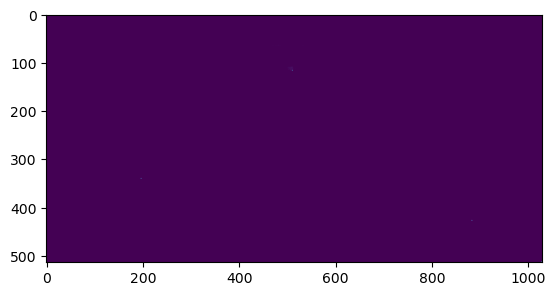

In [160]:
import matplotlib.pyplot as plt

plt.imshow(img0)

In [173]:
# Or read an entire array
arr = data['eiger500K_single_stats1_total'].read()

arr

array([6100.])

In [195]:
# We can also read an entire dataset in one go
ds = data.read()

ds

<xarray.Dataset> Size: 529MB
Dimensions:                        (time: 1, dim_0: 1000, dim_1: 514,
                                    dim_2: 1030)
Coordinates:
  * time                           (time) float64 8B 1.671e+09
Dimensions without coordinates: dim_0, dim_1, dim_2
Data variables:
    eiger500K_single_image         (time, dim_0, dim_1, dim_2) uint8 529MB 0 ...
    eiger500K_single_stats1_total  (time) float64 8B 6.1e+03
    eiger500K_single_stats2_total  (time) float64 8B 6.293e+03
    eiger500K_single_stats3_total  (time) float64 8B 6.015e+03
    eiger500K_single_stats4_total  (time) float64 8B 5.883e+03
    eiger500K_single_stats5_total  (time) float64 8B 5.034e+03
Attributes:
    stream_name:  primary

In [229]:
# It is easy to convert the data to a Pandas dataframe...
config = run['primary/config/eiger500K_single']

print(list(config.keys()))

interesting_variables = ['eiger500K_single_cam_acquire_period',
                         'eiger500K_single_cam_acquire_time',
                         'eiger500K_single_cam_num_images',
                         'eiger500K_single_stats4_compute_profiles',
                        'eiger500K_single_stats1_compute_centroid']
ds = config.read(interesting_variables)
ds.to_pandas().T

['eiger500K_single_cam_acquire_period', 'eiger500K_single_cam_acquire_time', 'eiger500K_single_cam_num_images', 'eiger500K_single_beam_center_x', 'eiger500K_single_beam_center_y', 'eiger500K_single_wavelength', 'eiger500K_single_det_distance', 'eiger500K_single_threshold_energy', 'eiger500K_single_photon_energy', 'eiger500K_single_stats1_bgd_width', 'eiger500K_single_stats1_centroid_threshold', 'eiger500K_single_stats1_compute_centroid', 'eiger500K_single_stats1_compute_histogram', 'eiger500K_single_stats1_compute_profiles', 'eiger500K_single_stats1_compute_statistics', 'eiger500K_single_stats1_hist_max', 'eiger500K_single_stats1_hist_min', 'eiger500K_single_stats1_hist_size', 'eiger500K_single_stats1_ts_num_points', 'eiger500K_single_stats2_bgd_width', 'eiger500K_single_stats2_centroid_threshold', 'eiger500K_single_stats2_compute_centroid', 'eiger500K_single_stats2_compute_histogram', 'eiger500K_single_stats2_compute_profiles', 'eiger500K_single_stats2_compute_statistics', 'eiger500K_

time,0
eiger500K_single_cam_acquire_period,0.00012
eiger500K_single_cam_acquire_time,0.000117
eiger500K_single_cam_num_images,1000
eiger500K_single_stats1_compute_centroid,No
eiger500K_single_stats4_compute_profiles,No


<xarray.Dataset> Size: 3MB
Dimensions:              (time: 1, dim_0: 514, dim_1: 1030, dim_2: 514,
                          dim_3: 1030)
Coordinates:
  * time                 (time) float64 8B 1.746e+09
Dimensions without coordinates: dim_0, dim_1, dim_2, dim_3
Data variables:
    y_pixel_size         (time) float64 8B 7.5e-05
    x_pixel_size         (time) float64 8B 7.5e-05
    detector_distance    (time) float64 8B 16.07
    incident_wavelength  (time) float64 8B 0.8265
    frame_time           (time) float64 8B 0.00012
    beam_center_x        (time) float64 8B 509.0
    beam_center_y        (time) float64 8B 65.0
    count_time           (time) float64 8B 0.000117
    pixel_mask           (time, dim_0, dim_1) uint32 2MB 0 0 0 0 0 ... 0 0 0 0 4
    binary_mask          (time, dim_2, dim_3) bool 529kB True True ... False
Attributes:
    stream_name:  eiger500K_single_image_metadata_patched_in_at_runtime


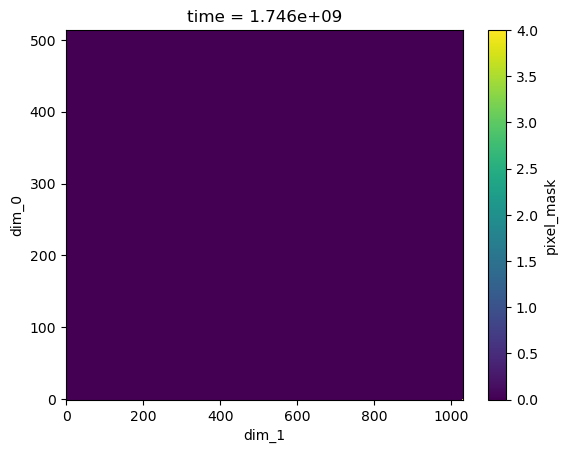

In [239]:
# ...or to plot them

ds = run["eiger500K_single_image_metadata_patched_in_at_runtime/data"].read()

print(ds)
ds['pixel_mask'].plot()

In [11]:
# ...or export (all or parts) of the data in your preferred format
import numpy as np
img = c[123456]['primary/data/eiger500K_single_image']

print(img)   # <- this is still an image client

img.export("image.png", slice=np.s_[0, 1, :, 200:700])

<ArrayClient shape=(1, 1000, 514, 1030) chunks=((1,), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), (514,), (1030,)) dtype=uint8 dims=('time', 'dim_0', 'dim_1', 'dim_2')>


In [251]:
# ...or just send someone a link to the data
img.item['links']

{'self': 'https://tiled.nsls2.bnl.gov/api/v1/metadata/chx/raw/92bd4434-94dd-40c2-bb26-5b3359793e0a/primary/data/eiger500K_single_image',
 'full': 'https://tiled.nsls2.bnl.gov/api/v1/array/full/chx/raw/92bd4434-94dd-40c2-bb26-5b3359793e0a/primary/data/eiger500K_single_image',
 'block': 'https://tiled.nsls2.bnl.gov/api/v1/array/block/chx/raw/92bd4434-94dd-40c2-bb26-5b3359793e0a/primary/data/eiger500K_single_image?block={0},{1},{2},{3}'}

### Using Dask to Manipulate Large Arrays

If an array is too big to fit in memory, one can use a [Dask](https://www.dask.org/)-enabled client that would allow to manipulate, reduce, slice, etc the array before downloading it.

In [186]:
c_dask = from_profile('chx', "dask")

img_dask = c_dask[123456]['primary/data/eiger500K_single_image']

print(img)

<DaskArrayClient shape=(1, 1000, 514, 1030) chunks=((1,), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), (514,), (1030,)) dtype=uint8 dims=('time', 'dim_0', 'dim_1', 'dim_2')>


In [187]:
img.read()

dask.array<remote-dask-array-https://tiled.nsls2.bnl.gov/api/v1/metadata/chx/raw/92bd4434-94dd-40c2-bb26, shape=(1, 1000, 514, 1030), dtype=uint8, chunksize=(1, 10, 514, 1030), chunktype=numpy.ndarray>

In [189]:
img_dask[0,:5,...].sum().compute()

22666

### Search over Metadata

Tiled supports search over the entire catalog of Bluesky Run based on the metadata received in the `Start` documents.

Learn more:
* https://blueskyproject.io/tiled/tutorials/search.html
* https://blueskyproject.io/tiled/reference/queries.html

In [ ]:
run.metadata

In [263]:
from tiled.queries import Contains, Key, Eq, FullText, NotEq, Like

In [258]:
c.search(Eq('auto_pipeline', 'XPCS_SAXS_auto'))

<Catalog {144762, 144763, 144764, 144765, 144766, 144767, ...} ~14762 entries>

In [257]:
c.search(Key('sample') == 'La4A_2')

<Catalog {123154, 123155, 123156, 123157, 123158, 123159, ...} ~4061 entries>

In [264]:
c.search(NotEq('plan_args.detectors', 'EigerSingleTrigger_AD37_V2') )

<Catalog {5, 6, 7, 8, 9, 10, 11, 12, 13, 14, ...} ~249327 entries>